In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
dataframe = pd.read_csv('C:/Users/Yusuf/Downloads/clean_data-1.csv')
dataframe.head()

,id,screen_name,location,description,url,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,name,bot
0,8.160000e+17,"""HoustonPokeMap""","""Houston, TX""","""Rare and strong PokŽmon in Houston, TX. See m...","""https://t.co/dnWuDbFRkt""",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",0,False,78554,"""en""","{\n ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,"""Houston PokŽ Alert""",1
1,4.843621e+09,kernyeahx,"Templeville town, MD, USA",From late 2014 Socium Marketplace will make sh...,NaN,1,349,0,2/1/2016 7:37,38,False,31,en,NaN,True,False,Keri Nelson,1
2,4.303727e+09,mattlieberisbot,NaN,"Inspired by the smart, funny folks at @replyal...",https://t.co/P1e1o0m4KC,1086,0,14,Fri Nov 20 18:53:22 +0000 2015,0,False,713,en,"{'retweeted': False, 'is_quote_status': False,...",True,False,Matt Lieber Is Bot,1
3,3.063139e+09,sc_papers,NaN,NaN,NaN,33,0,8,2/25/2015 20:11,0,False,676,en,Construction of human anti-tetanus single-chai...,True,True,single cell papers,1
4,2.955142e+09,lucarivera16,"Dublin, United States",Inspiring cooks everywhere since 1956.,NaN,11,745,0,1/1/2015 17:44,146,False,185,en,NaN,False,False,lucarivera16,1


In [11]:
print(dataframe.size)
print(dataframe.isnull().sum())
print(dataframe.shape)


48096
id                          0
screen_name                 0
location                  963
description               387
url                      1269
followers_count             0
friends_count               0
listed_count                0
created_at                  0
favourites_count            0
verified                    0
statuses_count              0
lang                        0
status                    279
default_profile             0
default_profile_image       0
name                        0
bot                         0
dtype: int64
(2672, 18)


In [12]:
dfl = dataframe.columns.values
dfl.tolist()
for i in dfl:
    if(dataframe[i].isnull().sum() / (dataframe.size / dataframe.shape[1]) > .35) : 
        dataframe.drop(labels = i, axis = 1, inplace = True) 
dataframe.head()

,id,screen_name,description,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,name,bot
0,8.160000e+17,"""HoustonPokeMap""","""Rare and strong PokŽmon in Houston, TX. See m...",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",0,False,78554,"""en""","{\n ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,"""Houston PokŽ Alert""",1
1,4.843621e+09,kernyeahx,From late 2014 Socium Marketplace will make sh...,1,349,0,2/1/2016 7:37,38,False,31,en,NaN,True,False,Keri Nelson,1
2,4.303727e+09,mattlieberisbot,"Inspired by the smart, funny folks at @replyal...",1086,0,14,Fri Nov 20 18:53:22 +0000 2015,0,False,713,en,"{'retweeted': False, 'is_quote_status': False,...",True,False,Matt Lieber Is Bot,1
3,3.063139e+09,sc_papers,NaN,33,0,8,2/25/2015 20:11,0,False,676,en,Construction of human anti-tetanus single-chai...,True,True,single cell papers,1
4,2.955142e+09,lucarivera16,Inspiring cooks everywhere since 1956.,11,745,0,1/1/2015 17:44,146,False,185,en,NaN,False,False,lucarivera16,1


Text(0.5, 1.0, 'Non Bot Account(Listed Count)')

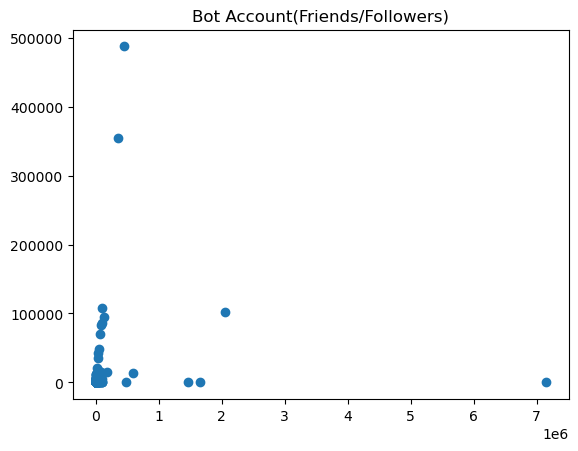

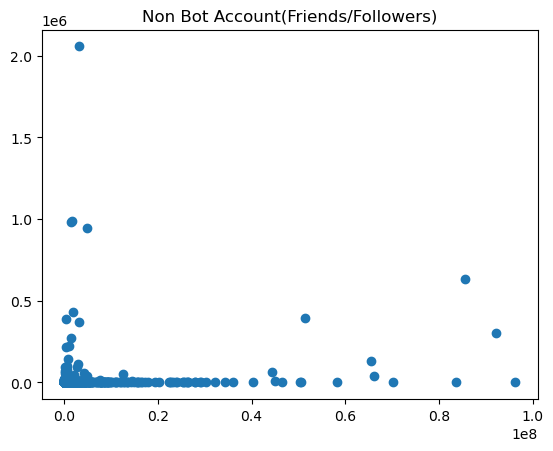

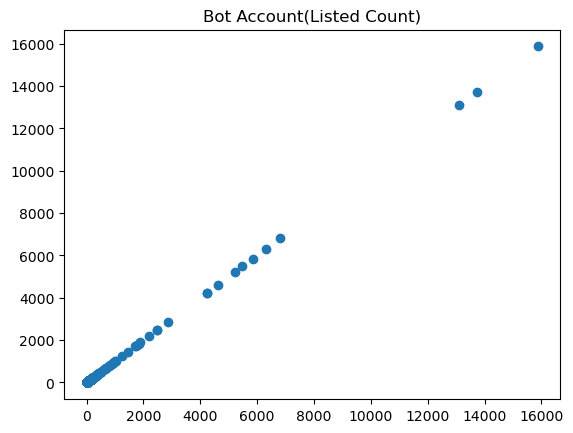

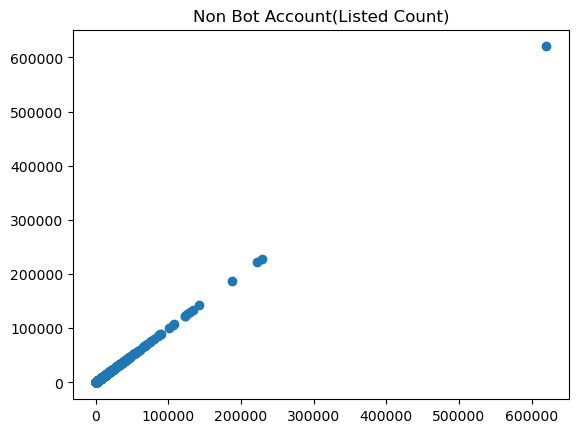

In [13]:
#bots
xlist = []
ylist = []
for i in dataframe.index:
    if (dataframe.loc[i, 'bot'] == 1):
        xlist.append(dataframe.loc[i,'followers_count'])
        ylist.append(dataframe.loc[i,'friends_count'])
x = xlist
y = ylist
plt.figure(1)
plt.scatter(x, y)
plt.title("Bot Account(Friends/Followers)")
#no bots
xlist.clear()
ylist.clear()
for i in dataframe.index:
    if (dataframe.loc[i, 'bot'] == 0):
        xlist.append(dataframe.loc[i,'followers_count'])
        ylist.append(dataframe.loc[i,'friends_count'])
x = xlist
y = ylist
plt.figure(2)
plt.scatter(x, y)
plt.title("Non Bot Account(Friends/Followers)")
xlist.clear()
ylist.clear()
for i in dataframe.index:
    if (dataframe.loc[i, 'bot'] == 1):
        xlist.append(dataframe.loc[i,'listed_count'])
        ylist.append(dataframe.loc[i,'listed_count'])
x = xlist
y = ylist
plt.figure(3)
plt.scatter(x,y)
plt.title("Bot Account(Listed Count)")
xlist.clear()
ylist.clear()
for i in dataframe.index:
    if (dataframe.loc[i, 'bot'] == 0):
        xlist.append(dataframe.loc[i,'listed_count'])
        ylist.append(dataframe.loc[i,'listed_count'])
x = xlist
y = ylist
plt.figure(4)
plt.scatter(x,y)
plt.title("Non Bot Account(Listed Count)")

In [14]:
Bag_of_words = ["bot", "follow me", "free", "fake", "virus", "troll", "clone", "tweet me"]
screenB = [] 
nameB = []
descriptionB = []
statusB = []
count = 0
for k in dataframe.index:
    count += 1
    found1 = False
    found2 = False
    found3 = False
    found4 = False
    for i in Bag_of_words:
        if (i in dataframe.loc[k, 'screen_name']) & (not found1):
            screenB.append(True)
            found1 = True
        if (i in dataframe.loc[k, 'name']) & (not found2):
            nameB.append(True)
            found2 = True
        if (i in str(type(dataframe.loc[k, 'description']))) & (not found3):
            descriptionB.append(True)
            found3 = True
        if (i in str(type(dataframe.loc[k, 'status']))) & (not found4):
            statusB.append(True)
            found4 = True
    if len(screenB) != count:
        screenB.append(False)
    if len(nameB) != count:
        nameB.append(False)
    if len(descriptionB) != count:
        descriptionB.append(False)
    if len(statusB) != count:
        statusB.append(False)
    
dataframe['screen_name_binary'] = screenB
dataframe['name_binary'] = nameB
dataframe['description_binary'] = descriptionB
dataframe['status_binary'] = statusB
dataframe.head()

,id,screen_name,description,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,name,bot,screen_name_binary,name_binary,description_binary,status_binary
0,8.160000e+17,"""HoustonPokeMap""","""Rare and strong PokŽmon in Houston, TX. See m...",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",0,False,78554,"""en""","{\n ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,"""Houston PokŽ Alert""",1,False,False,False,False
1,4.843621e+09,kernyeahx,From late 2014 Socium Marketplace will make sh...,1,349,0,2/1/2016 7:37,38,False,31,en,NaN,True,False,Keri Nelson,1,False,False,False,False
2,4.303727e+09,mattlieberisbot,"Inspired by the smart, funny folks at @replyal...",1086,0,14,Fri Nov 20 18:53:22 +0000 2015,0,False,713,en,"{'retweeted': False, 'is_quote_status': False,...",True,False,Matt Lieber Is Bot,1,True,False,False,False
3,3.063139e+09,sc_papers,NaN,33,0,8,2/25/2015 20:11,0,False,676,en,Construction of human anti-tetanus single-chai...,True,True,single cell papers,1,False,False,False,False
4,2.955142e+09,lucarivera16,Inspiring cooks everywhere since 1956.,11,745,0,1/1/2015 17:44,146,False,185,en,NaN,False,False,lucarivera16,1,False,False,False,False


In [17]:
from sklearn.metrics import accuracy_score
sk = tree.DecisionTreeClassifier(criterion = 'entropy')
subset = dataframe[["friends_count", "followers_count", "screen_name_binary", "name_binary", "status_binary", "verified" , "statuses_count", "bot"]]
xcolumn = ["friends_count", "followers_count", "screen_name_binary", "name_binary", "status_binary", "verified" , "statuses_count"]
x = subset[xcolumn]
y = subset['bot']
x_train, x_test, y_train, y_test = t.train_test_split(x, y, test_size = 0.3)
sk.fit(x_train,y_train)
y_pred_train = sk.predict(x_train)
y_pred_test = sk.predict(x_test)
#from sklearn import metrics
#print("Accuracy:", metrics.accuracy_score(y, y_pred))
print("Training Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Testing Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))

Training Accuracy: 1.00000
Testing Accuracy: 0.83666
